In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
from scipy import optimize
import matplotlib.ticker as ticker

In [3]:
data = pd.read_csv('data.csv')
data

,U кВ,I мА
0,2.20,0.00
1,2.25,0.01
2,2.30,0.01
3,2.35,0.01
4,2.40,0.02
5,2.45,0.02
6,2.50,0.02
7,2.55,0.03
8,2.60,0.03
9,2.65,0.04


In [4]:
I = np.array(data['I мА'])[:-1]
U = np.array(data['U кВ'])[:-1]

a =  8.392318025314713
b =  -25.64280374381982
c =  0.009201722220122438
sigma_a =  0.8478305739042494
sigma_b =  2.3693577026504933
sigma_c =  0.002659267886119804
S_e =  0.004576179586177967
Relative S_r a = %  10.102460027692477
Relative S_r b = %  9.23985429331819
Relative S_r c = %  28.89967576183168


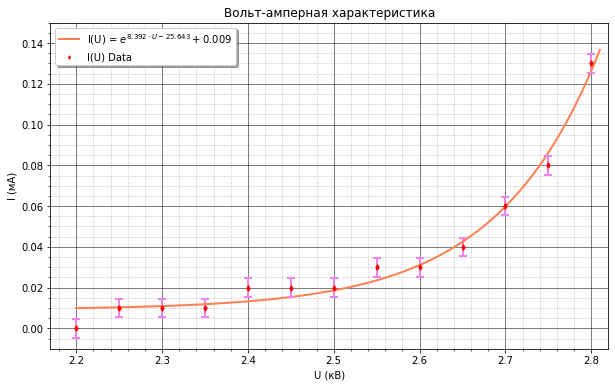

In [5]:
def approx(x, a, b, c):
    return c + np.exp(a*x + b)
beta_opt1, beta_cov1 = curve_fit(approx, U, I)
a = beta_opt1[0]
b = beta_opt1[1]
c = beta_opt1[2]

print('a = ', a)
print('b = ', b)
print('c = ', c)

#получим погрешности для коэффициентов
sigma_a = np.sqrt(beta_cov1[0,0])
sigma_b = np.sqrt(beta_cov1[1,1])
sigma_c = np.sqrt(beta_cov1[2,2])

print('sigma_a = ', sigma_a)
print('sigma_b = ', sigma_b)
print('sigma_c = ', sigma_c)

residuals1 = I - approx(U,*beta_opt1)
fres1 = sum(residuals1**2)
S_e = np.sqrt(fres1/len(U))
print('S_e = ', S_e)

print('Relative S_r a = % ', 100* sigma_a/abs(a))
print('Relative S_r b = % ', 100* sigma_b/abs(b))
print('Relative S_r c = % ', 100* sigma_c/abs(c))

fig, ax = plt.subplots(figsize=(10, 6))
# график
dots = np.arange(2.2,2.82,0.01)
ax.scatter(U, I, marker = 'd', color = 'red', s = 5)
ax.plot(dots, approx(dots, *beta_opt1), 'coral', lw = 2)
lgnd = ax.legend([r'I(U) = $e^{%.3f \cdot U - %.3f} + %.3f$'%(a, abs(b), c), r'I(U) Data'], loc='upper left', shadow=True)

ax.set_title(r'Вольт-амперная характеристика')
ax.set_ylabel(r'I (мА)')
ax.set_xlabel(r'U (кВ)')

ax.grid(which='major',
color = 'k')

ax.minorticks_on()

ax.grid(which='minor',
color = 'gray',
linestyle = ':', linewidth = 0.5)

ax.grid(which='major', linewidth = 0.5)
plt.errorbar(U, I, fmt = 'ro', marker = 'd', markersize = '4', yerr = S_e, capsize = 4, elinewidth = 2, capthick = 2, ecolor = 'violet')
plt.xlim (2.17, 2.82)
plt.ylim (-0.01, 0.15)
plt.savefig('I(U).png', dpi=400, quality=100)
plt.show()

In [6]:
lni = np.log(I[1:]/U[1:]**2)
us = 1/U[1:]

a =  -23.170511214416596
b =  3.7749793518469543
sigma_a =  2.465314346878523
sigma_b =  0.9832774342198564
S_e =  0.21322483579472631
Relative S_r a = %  10.639878956769046
Relative S_r b = %  26.047226820956674


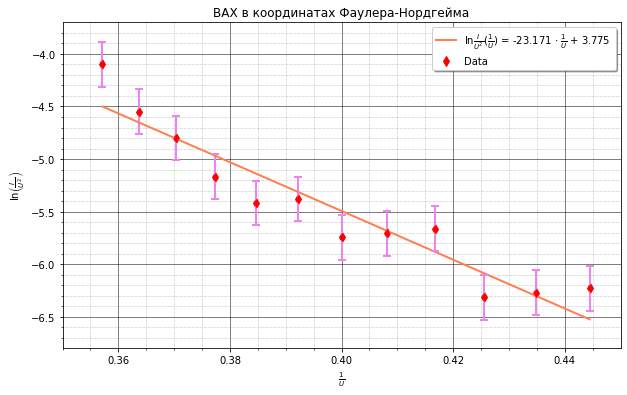

In [15]:
def approx(x, a, b):
    return a * x + b
beta_opt1, beta_cov1 = curve_fit(approx, us, lni)
a = beta_opt1[0]
b = beta_opt1[1]

print('a = ', a)
print('b = ', b)

#получим погрешности для коэффициентов
sigma_a = np.sqrt(beta_cov1[0,0])
sigma_b = np.sqrt(beta_cov1[1,1])

print('sigma_a = ', sigma_a)
print('sigma_b = ', sigma_b)

residuals1 = lni - approx(us,*beta_opt1)
fres1 = sum(residuals1**2)
S_e = np.sqrt(fres1/len(us))
print('S_e = ', S_e)

print('Relative S_r a = % ', 100* sigma_a/abs(a))
print('Relative S_r b = % ', 100* sigma_b/abs(b))

# график
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(us, approx(us, *beta_opt1), 'coral', lw = 2)
ax.scatter(us, lni, marker = 'd', color = 'red', s = 50)
lgnd = ax.legend([r'$\ln{\frac{I}{U^2}}(\frac{1}{U})$ = %.3f $\cdot$ $\frac{1}{U}$ + %.3f ' %(a,abs(b)),'Data'], loc='best', shadow=True)

ax.set_title(r'ВАХ в координатах Фаулера-Нордгейма')
ax.set_ylabel(r'$\ln{\left( \frac{I}{U^2} \right)}$')
ax.set_xlabel(r'$\frac{1}{U}$')

ax.grid(which='major',
color = 'k')

ax.minorticks_on()

ax.grid(which='minor',
color = 'gray',
linestyle = ':', linewidth = 0.5)

ax.grid(which='major', linewidth = 0.5)
plt.errorbar(us, lni, fmt = 'ro', marker = 'd', markersize = '5', yerr = S_e, capsize = 4, elinewidth = 2, capthick = 2, ecolor = 'violet')

plt.ylim (-6.8, -3.7)
plt.xlim (0.35, 0.45)
plt.savefig('Ln.png', dpi=400, quality=100)
plt.show()

In [12]:
max(us)

0.4444444444444444